In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.preprocessing import MinMaxScaler #scaling data
from sklearn.model_selection import train_test_split #splitting data
from sklearn.metrics import mean_squared_error #error calculation
from sklearn.metrics import r2_score #error calculation
from sklearn.neighbors import KNeighborsRegressor #kneighbors algorithm
import math #for sqrt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.neighbors import NearestNeighbors #knebighbors
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meatconsumption/meat_consumption_worldwide.csv


In [2]:
df=pd.read_csv("../input/meatconsumption/meat_consumption_worldwide.csv") #reading data
df

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226
...,...,...,...,...,...
13755,MYS,SHEEP,THND_TONNE,2022,44.154151
13756,MYS,SHEEP,THND_TONNE,2023,44.897588
13757,MYS,SHEEP,THND_TONNE,2024,45.612107
13758,MYS,SHEEP,THND_TONNE,2025,46.325312


In [3]:
df_copy=df.groupby(['LOCATION','MEASURE','TIME'])['Value'].agg('sum').reset_index() #grouping data by location,measure and time and suming the value
df_copy=df_copy[df_copy['MEASURE']=="THND_TONNE"] #removing the kg_cap data
fig = px.scatter(df_copy, x="TIME", y="Value",color="LOCATION",title="Meat consumption by year and location") 
fig.show()#Plotting the meat consumption by year and location
fig=px.line(df_copy,x="TIME", y="Value",color="LOCATION",title="Meat consumption by year and location")
fig.show() #Plotting the meat consumption by year and location
df_year_total=df_copy.groupby(['TIME'])['Value'].agg('sum').reset_index()


In [4]:
fig=px.line(df_year_total,x="TIME", y="Value")#Plotting the meat consumption by year
fig.show()

In [5]:
df.info() #checking type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB


In [6]:
df.isnull().sum() #checking for null values

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64

In [7]:
df.nunique() #checking how many unique values for each column

LOCATION       48
SUBJECT         4
MEASURE         2
TIME           37
Value       11383
dtype: int64

In [8]:
df.describe() #looking for min value( if -1 exists)

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


In [9]:
locations=df["LOCATION"].value_counts() #unique values by country
fig = px.scatter(locations, x=locations.keys(), y=locations.values,color=locations.values,title="Entries by country",
                labels={
                     "y": "Number of meat entries for each country", #label for y axis
                     "index": "Country code", #label for x axis
                    
                 })
fig.show() #Plotting unique valeus by country

In [10]:
meat=df["SUBJECT"].value_counts()  #unique values by meat type
fig = px.scatter(meat, x=meat.keys(), y=meat.values,color=meat.values,title="Meat consumption by category",
                 labels={
                     "y": "Number of meat entries for each type of meat", #label for y axis
                     "index": "Meat type", #label for x axis
                    
                 })
fig.show()  #Plotting unique valeus by meat type

In [11]:
scaler = MinMaxScaler() #initialising scaler
scaled_time = scaler.fit_transform(df[['TIME']]) #scaling the time column
df['TIME'] = scaled_time

In [12]:
y = pd.get_dummies(df.LOCATION) #One hot encoding the location measure and subject axis
df = df.drop('LOCATION',axis = 1)
# Join the encoded df
df = df.join(y)
y = pd.get_dummies(df.MEASURE)
df = df.drop('MEASURE',axis = 1)
# Join the encoded df
df = df.join(y)
y = pd.get_dummies(df.SUBJECT)
df = df.drop('SUBJECT',axis = 1)
# Join the encoded df
df = df.join(y)
df.corr()


,TIME,Value,ARG,AUS,BGD,BRA,BRICS,CAN,CHE,CHL,...,VNM,WLD,ZAF,ZMB,KG_CAP,THND_TONNE,BEEF,PIG,POULTRY,SHEEP
TIME,1.000000,0.053866,-0.000737,0.000990,-0.002452,-0.002452,0.012829,-0.002452,-0.001724,-0.002452,...,-0.002452,0.023380,-0.002452,-0.002452,0.003709,-0.003709,0.008698,-0.001095,-0.003778,-0.003778
Value,0.053866,1.000000,-0.020856,-0.024241,-0.028326,0.003151,0.174487,-0.023258,-0.019159,-0.026819,...,-0.021141,0.488246,-0.024227,-0.028984,-0.192791,0.192791,-0.017765,0.070997,0.040589,-0.093853
ARG,-0.000737,-0.020856,1.000000,-0.021757,-0.021909,-0.021909,-0.021218,-0.021909,-0.015407,-0.021909,...,-0.021909,-0.020586,-0.021909,-0.021909,0.003480,-0.003480,0.001604,0.000406,0.000158,-0.002159
AUS,0.000990,-0.024241,-0.021757,1.000000,-0.021832,-0.021832,-0.021144,-0.021832,-0.015354,-0.021832,...,-0.021832,-0.020514,-0.021832,-0.021832,0.003468,-0.003468,-0.000152,-0.001337,0.000743,0.000743
BGD,-0.002452,-0.028326,-0.021909,-0.021832,1.000000,-0.021985,-0.021291,-0.021985,-0.015461,-0.021985,...,-0.021985,-0.020657,-0.021985,-0.021985,0.003492,-0.003492,0.001024,-0.000174,-0.000422,-0.000422
BRA,-0.002452,0.003151,-0.021909,-0.021832,-0.021985,1.000000,-0.021291,-0.021985,-0.015461,-0.021985,...,-0.021985,-0.020657,-0.021985,-0.021985,0.003492,-0.003492,0.001024,-0.000174,-0.000422,-0.000422
BRICS,0.012829,0.174487,-0.021218,-0.021144,-0.021291,-0.021291,1.000000,-0.021291,-0.014973,-0.021291,...,-0.021291,-0.020006,-0.021291,-0.021291,0.003382,-0.003382,0.001591,-0.001957,0.000186,0.000186
CAN,-0.002452,-0.023258,-0.021909,-0.021832,-0.021985,-0.021985,-0.021291,1.000000,-0.015461,-0.021985,...,-0.021985,-0.020657,-0.021985,-0.021985,0.003492,-0.003492,0.001024,-0.000174,-0.000422,-0.000422
CHE,-0.001724,-0.019159,-0.015407,-0.015354,-0.015461,-0.015461,-0.014973,-0.015461,1.000000,-0.015461,...,-0.015461,-0.014527,-0.015461,-0.015461,-0.101846,0.101846,0.000720,-0.000122,-0.000297,-0.000297
CHL,-0.002452,-0.026819,-0.021909,-0.021832,-0.021985,-0.021985,-0.021291,-0.021985,-0.015461,1.000000,...,-0.021985,-0.020657,-0.021985,-0.021985,0.003492,-0.003492,0.001024,-0.000174,-0.000422,-0.000422


           TIME  ARG  AUS  BGD  BRA  BRICS  CAN  CHE  CHL  CHN  ...  VNM  WLD  \
0      0.027778    0    1    0    0      0    0    0    0    0  ...    0    0   
1      0.055556    0    1    0    0      0    0    0    0    0  ...    0    0   
2      0.083333    0    1    0    0      0    0    0    0    0  ...    0    0   
3      0.111111    0    1    0    0      0    0    0    0    0  ...    0    0   
4      0.138889    0    1    0    0      0    0    0    0    0  ...    0    0   
...         ...  ...  ...  ...  ...    ...  ...  ...  ...  ...  ...  ...  ...   
13755  0.888889    0    0    0    0      0    0    0    0    0  ...    0    0   
13756  0.916667    0    0    0    0      0    0    0    0    0  ...    0    0   
13757  0.944444    0    0    0    0      0    0    0    0    0  ...    0    0   
13758  0.972222    0    0    0    0      0    0    0    0    0  ...    0    0   
13759  1.000000    0    0    0    0      0    0    0    0    0  ...    0    0   

       ZAF  ZMB  KG_CAP  TH

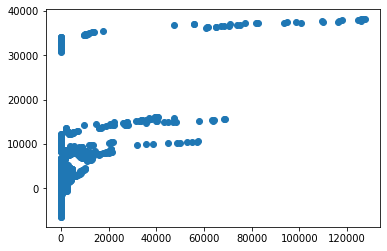

In [13]:
X=df.drop('Value', axis=1) #all columns without the one we calculate the result for
y=df[["Value"]] #the value column 
print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #splitting data into train and test
regressor = LinearRegression() #initialising linear regression
regressor.fit(X_train,y_train) #fitting the data
y_pred = regressor.predict(X_test) #predict the result
print(y_pred)
plt.scatter(y_test,y_pred) #plotting the answers vs the results


#the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is ",score) #printing the accyracy
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))

Training accuracy: 0.9992838538701728
Testing accuracy: 0.9988650338951668


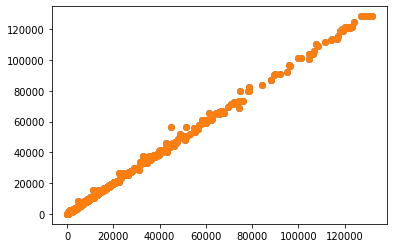

In [14]:
neighbor = KNeighborsRegressor() #initialising the kneighbors algorithm
neighbor.fit(X_train, y_train) #fitting the data
print("Training accuracy:",neighbor.score(X_train, y_train)) 
print("Testing accuracy:",neighbor.score(X_test, y_test))
y_pred_test = neighbor.predict(X_test)
y_pred_train = neighbor.predict(X_train)
plt.scatter(y_train,y_pred_train);
plt.scatter(y_train,y_pred_train);
